In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


In [5]:

data = pd.read_csv('R02_rice_field.csv')
print(data.head())


   Production (X)  Harvest Area (Y)
0       1329536.0          323589.0
1       1299699.0          329041.0
2       1382905.0          339253.0
3       1419128.0          348223.0
4       1368074.0          337561.0


In [7]:
print(data.info())
print(data.describe())

print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Production (X)    224 non-null    float64
 1   Harvest Area (Y)  224 non-null    float64
dtypes: float64(2)
memory usage: 3.6 KB
None
       Production (X)  Harvest Area (Y)
count    2.240000e+02        224.000000
mean     1.679701e+06     374349.966920
std      1.161387e+06     232751.161987
min      4.293800e+04      63142.040000
25%      5.488570e+05     146919.500000
50%      1.667773e+06     373551.500000
75%      2.436851e+06     514570.250000
max      4.881089e+06     872737.000000
Production (X)      0
Harvest Area (Y)    0
dtype: int64


In [11]:
data.fillna(data.median(), inplace=True)

In [111]:
X = data.drop('Production (X)', axis=1) 
y = data['Harvest Area (Y)']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [102]:

model = SVR(kernel='rbf')  


model.fit(X_train, y_train)


SVR()

In [104]:

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 41653731800.96824
R-squared: -0.018706734363134858


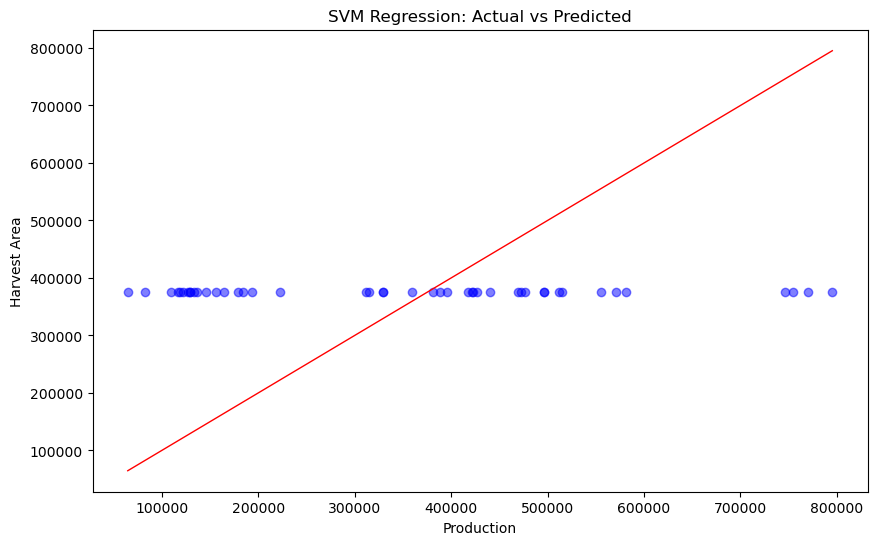

In [117]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=1)
plt.xlabel("Production")
plt.ylabel("Harvest Area")
plt.title("SVM Regression: Actual vs Predicted")
plt.show()